In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# read data
data = pd.read_csv("data/covtype.csv")
X = data.drop("Cover_Type", axis=1).values
y = data["Cover_Type"].values - 1

# extract sample
Xsample, _, Ysample, _ = train_test_split(X, y, stratify=y, train_size=5000, random_state=0)
Ysample[Ysample!=1] = -1

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

m1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500) # decision stump
m2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
m3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500)

In [4]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def cross_validate_rounds_cruve(model, X, y):
    kfold = StratifiedKFold(n_splits=3)    
    train_score = []
    test_score = []
    for i, (train_idx, test_idx )in enumerate(kfold.split(X, y)):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        model.fit(X_train, y_train)
        train_staged_score = [1-s for s in model.staged_score(X_train, y_train)]
        train_score += [train_staged_score]
        
        test_staged_score = [1-s for s in model.staged_score(X_test, y_test)]
        test_score += [test_staged_score]
        
    return train_score, test_score

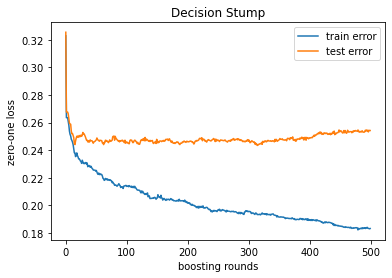

In [9]:
tr, te = cross_validate_rounds_cruve(m1, Xsample, Ysample)
plt.plot(np.array(tr).mean(axis=0), label="train error")
plt.plot(np.array(te).mean(axis=0), label="test error")
plt.xlabel("boosting rounds")
plt.ylabel("zero-one loss")
plt.title("Decision Stump")
plt.legend()

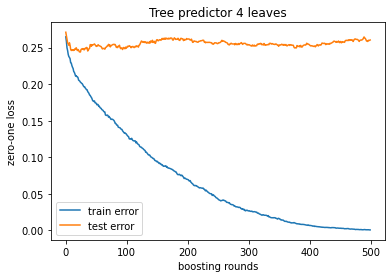

In [12]:
tr, te = cross_validate_rounds_cruve(m2, Xsample, Ysample)
plt.plot(np.array(tr).mean(axis=0), label="train error")
plt.plot(np.array(te).mean(axis=0), label="test error")
plt.xlabel("boosting rounds")
plt.ylabel("zero-one loss")
plt.title("Tree predictor 4 leaves")
plt.legend()

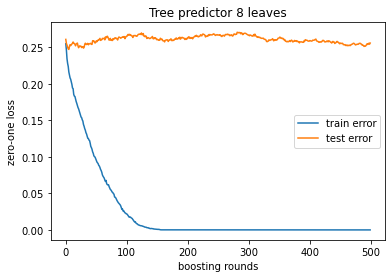

In [13]:
tr, te = cross_validate_rounds_cruve(m3, Xsample, Ysample)
plt.plot(np.array(tr).mean(axis=0), label="train error")
plt.plot(np.array(te).mean(axis=0), label="test error")
plt.xlabel("boosting rounds")
plt.ylabel("zero-one loss")
plt.title("Tree predictor 8 leaves")
plt.legend()